# Raport z analizy danych

Rozwój supermarketów w najbardziej zaludnionych miastach rośnie, a konkurencja na rynku jest również wysoka. Zbiór danych to jedna z historycznych sprzedaży firmy supermarketów, która została zarejestrowana w 3 różnych oddziałach przez 3 miesiące. 

## Biblioteki

Do analizy wykorzystane zostaną popularne biblioteki stosowane w dziedzinie danych:
- `Pandas`, zbiór narzędzi do analizy danych,
- `Matplotlib` oraz `Seaborn` do wizualizacji danych,

In [157]:
import math
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings

### Konfiguracja

Ustawienia bibliotek i reużywalne stałe wartości

In [160]:
from typing import List

# Set theme to "whitegrid"
# Applies both to Matplotlib and Seaborn (Seaborn internally uses matplotlib)
sns.set_style("whitegrid")

# Make custom color palette from list of colors
PLOT_COLORS: List[str] = [
    "#6247aa",
    "#7251b5",
    "#815ac0",
    "#9163cb",
    "#a06cd5",
    "#b185db",
]

custom_palette = sns.color_palette(PLOT_COLORS)

# Silence seaborn FutureWarning and UserWarning
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)


def get_color(i: int) -> str:
    return PLOT_COLORS[i % len(PLOT_COLORS)]

# Zbiór danych

Załadowanie zbioru danych do DataFrame oraz wyświetlenie pierwszych pięciu rekordów

In [5]:
df = pd.read_csv("../data/biedronki.csv")
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


Zbiór danych zawiera 1000 wierszy i 17 kolumn - 7 kolumn numerycznych i 10 kolumn kategorycznych (w tym jedna kolumna z unikatowym ID i dwie kolumny reprezentujące czas).

| Kolumna | Opis |
| --- | --- |
| Invoice id | Numer identyfikacyjny faktury sprzedaży wygenerowany komputerowo |
| Branch | Oddział supercentrum (dostępne są 3 oddziały oznaczone literami A, B i C). |
| City | Lokalizacja supercentrów |
| Customer type | Typ klientów, zarejestrowany przez członków dla klientów korzystających z karty członkowskiej i normalny dla klientów bez karty członkowskiej. |
| Gender | Płeć klienta |
| Product line | Ogólne grupy kategoryzacji przedmiotów - Akcesoria elektroniczne, Akcesoria modowe, Żywność i napoje, Zdrowie i uroda, Dom i styl życia, Sport i podróże |
| Unit price | Cena każdego produktu w $ |
| Quantity | Liczba produktów zakupionych przez klienta |
| Tax | Opłata podatkowa w wysokości 5% dla klienta dokonującego zakupu |
| Total | Cena całkowita z podatkiem |
| Date | Data zakupu (rekord dostępny od stycznia 2019 r. do marca 2019 r.) |
| Time | Czas zakupu (od 10:00 do 21:00) |
| Payment | Płatność wykorzystana przez klienta do zakupu (dostępne są 3 metody - gotówka, karta kredytowa i portfel elektroniczny) |
| COGS | Koszt sprzedanych towarów |
| Gross margin percentage | Procentowa marża brutto |
| Gross income | Dochód brutto |
| Rating | Ocena stratyfikacji klientów dotycząca ich ogólnego doświadczenia zakupowego (w skali od 1 do 10) |

Niezwykle ważny do podkreślenia jest fakt, że analizowany zbiór danych **nie zawiera** brakujących wartości.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

Z kolumn `Date` i `Time` można utworzyć jedną, lepiej interpretowalną kolumnę `Datetime`

In [7]:
df["Datetime"] = pd.to_datetime(df["Date"] + " " + df["Time"])

## Dane numeryczne

Statystyki opisowe danych numerycznych

In [136]:
# Subset df to only include float64 and int64 columns
df_num = df.select_dtypes(include=["float64", "int64"])

df_num_desc = df_num.describe()

df_num_desc.loc["range"] = df_num_desc.loc["max"] - df_num_desc.loc["min"]
df_num_desc.loc["skew"] = df_num.skew()
df_num_desc.loc["kurt"] = df_num.kurt()
df_num_desc

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,55.672130,5.510000,15.379369,322.966749,307.587380,4.761905,15.379369,6.972700
std,26.494628,2.923431,11.708825,245.885335,234.176510,0.000000,11.708825,1.718580
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905,0.508500,4.000000
25%,32.875000,3.000000,5.924875,124.422375,118.497500,4.761905,5.924875,5.500000
50%,55.230000,5.000000,12.088000,253.848000,241.760000,4.761905,12.088000,7.000000
75%,77.935000,8.000000,22.445250,471.350250,448.905000,4.761905,22.445250,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905,49.650000,10.000000
range,89.880000,9.000000,49.141500,1031.971500,982.830000,0.000000,49.141500,6.000000
skew,0.007077,0.012941,0.892570,0.892570,0.892570,0.000000,0.892570,0.009010


Przyglądając się statystykom opisowym można zauważyć, że:
- rozkłady opisujące ceny charakteryzują się dodatnią skośnością, co oznacza, że większość cen jest niższa niż średnia i rozkład jest lewostronny,
- kolumna `Unit price` ma niezwykle zbliżone wartości średniej i mediany, co oznacza, że rozkład jest symetryczny, podobnie dla kolumny `Quantity`

## Dane kategoryczne

Statystyki opisowe danych kategorycznych

In [9]:
df.drop(["Date", "Time"], axis=1).describe(include=object)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Payment
count,1000,1000,1000,1000,1000,1000,1000
unique,1000,3,3,2,2,6,3
top,750-67-8428,A,Yangon,Member,Female,Fashion accessories,Ewallet
freq,1,340,340,501,501,178,345


Przyglądając się statystykom opsiowym można zauważyć, że w zbiór jest niezwykle zbalansowany.

Co więcej, zbiór danych zdaje się nie mieć wartości odstających (outliers).

## Rozkłady danych numerycznych

Rozkłady dla danych numerycznych.

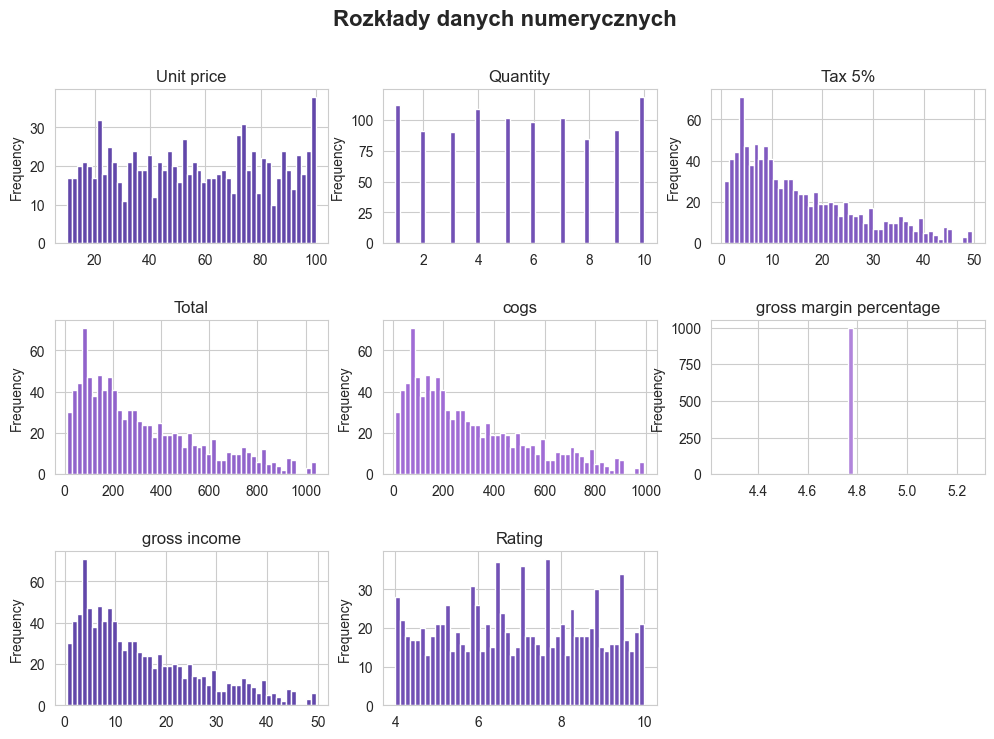

In [13]:
# Define subset df
df_numeric = df.select_dtypes(include=["float64", "int64"])

fig, ax = plt.subplots(
    nrows=math.ceil(len(df_numeric.columns) / 3), ncols=3, figsize=(12, 8)
)

# Increase space between rows
fig.subplots_adjust(hspace=0.5)

# Title
fig.suptitle("Rozkłady danych numerycznych", fontsize=16, fontweight="bold")

for i, feature in enumerate(df.select_dtypes(include=["float64", "int64"])):
    ax_curr = ax[int(i / 3)][i % 3]
    df[feature].plot(kind="hist", ax=ax_curr, color=get_color(i), bins=50).set_title(
        feature
    )

# Remove empty subplot
fig.delaxes(ax[2][2])

## Rozkłady danych kategorycznych

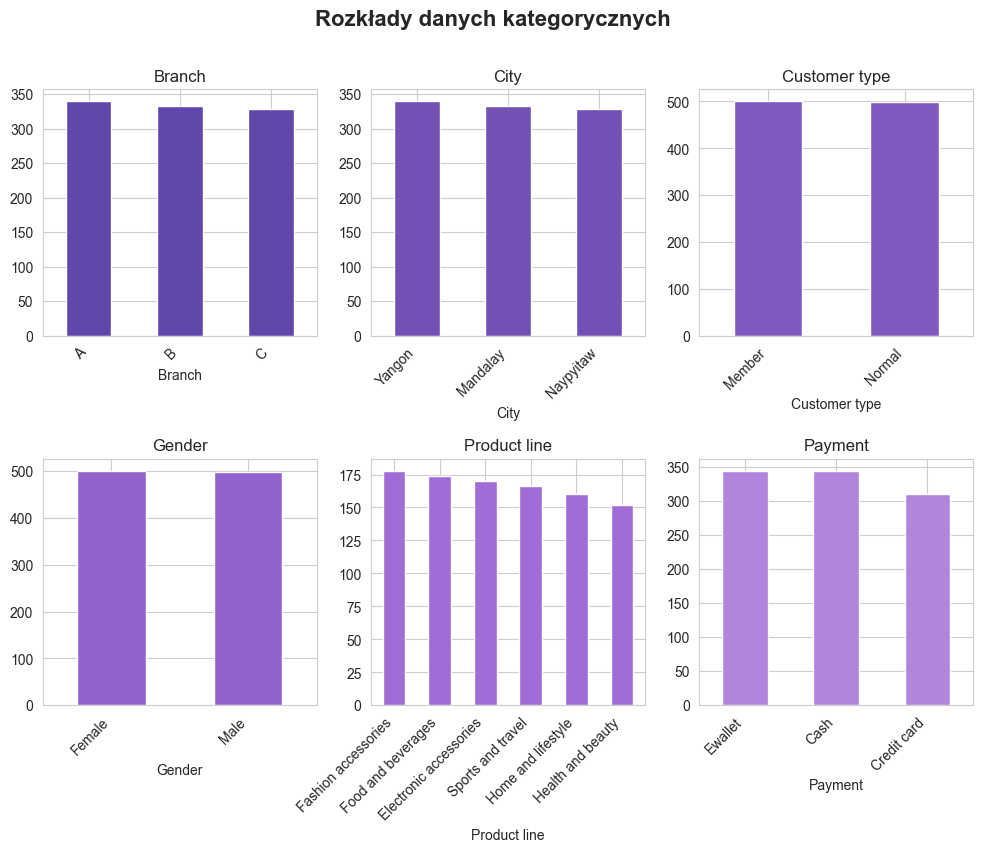

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

# Increase space between rows
fig.subplots_adjust(hspace=0.5)

# Title
fig.suptitle("Rozkłady danych kategorycznych", fontsize=16, fontweight="bold")

for i, feature in enumerate(
    df[
        [
            "Branch",
            "City",
            "Customer type",
            "Gender",
            "Product line",
            "Payment",
        ]
    ]
):
    ax_curr = ax[int(i / 3)][i % 3]
    df[feature].value_counts().plot(
        kind="bar", ax=ax_curr, color=get_color(i)
    ).set_title(feature)

    # Rotate x-labels to 45 degrees and set ha to right
    for label in ax_curr.get_xticklabels():
        label.set_rotation(45)
        label.set_ha("right")

# Analiza korelacji

Po usunięciu kolumn które nie mają wpływu na analizę danych (np. `gross margin percentage`) oraz tych, które bezpośrednio wynikają z siebie (np. `Tax 5%`), macierz korelacji wygląda następująco:

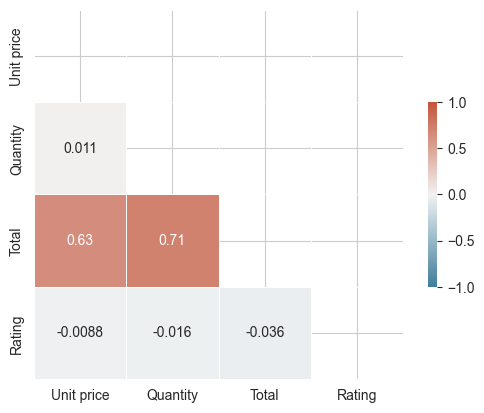

In [144]:
# Remove rendundant columns
df_numeric_corr = df_numeric.drop(
    ["gross income", "Tax 5%", "cogs", "gross margin percentage"], axis=1
)

# Correlation matrix
corr = df_numeric_corr.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Title
fig.suptitle("Macierz korelacji", fontsize=16, fontweight="bold")

# Draw the heatmap with the mask and values
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    vmax=1,
    vmin=-1,
    center=0,
    annot=True,
    square=True,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
)

plt.show()

Macierz korelacji dla danych numerycznych nie przedstawia nic niezwykłego. Największą korelację mają kolumny `Total` i `Quantity`, co jest oczywiste, ponieważ cena całkowita jest iloczynem ceny jednostkowej i ilości.

Co ciekawe, kolumna `Rating` nie wykazuje silnej korelacji z żadną z kolumn numerycznych. Można zatem przypuszczać, że ocena klienta nie jest zależna od ceny produktu, ilości zakupionych produktów czy też od dochodu brutto.

# Podsumowanie statystyk opisowych

Po przyjrzeniu się statystykom opisowym oraz rozkładom danych można zauważyć, że zbiór danych jest niezwykle zbalansowany, nie zawiera brakujących wartości oraz wartości odstających.Co więcej, uwagę przykuwają rozkłady dla `Unit price`, `Quantity` oraz `Rating`, które zdają się być symetryczne i przypominające rozkład równomierny, co jest dosyć niezwykłe w przypadku danych rzeczywistych.

Taka obserwacja może być spowodowana faktem, że zbiór danych jest sztucznie wygenerowany, a nie pochodzi z rzeczywistych danych, lub że metoda zbierania danych była niepoprawna lub zawierała błąd.

W następnej części raportu przyjrzymy się bliżej tej tezie i spróbujemy odpowiedzieć na pytanie, czy zbiór danych jest rzeczywiście sztucznie wygenerowany, wykorzystując wiedzę domenową, wizualizacje danych i testy statystyczne.

# Analiza oceny doświadczenia zakupowego

W tej części raportu przyjrzymy się kolumnie `Rating` i spróbujemy odpowiedzieć na pytanie, czy ocena klienta jest zależna od innych kolumn.

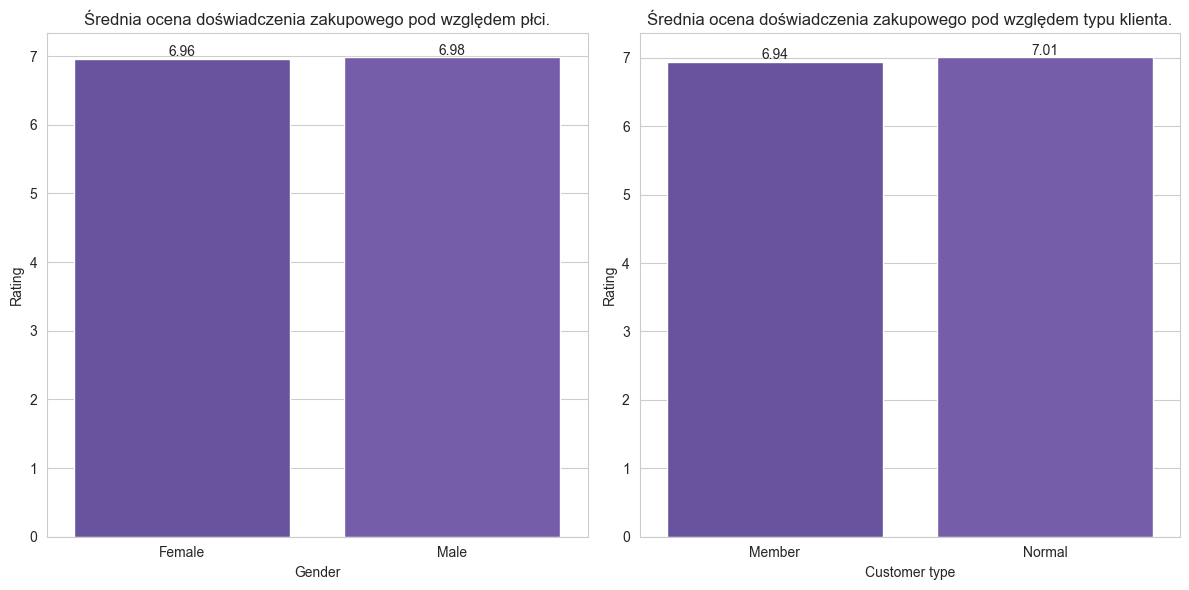

In [165]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)  # 1 row, 2 columns, first plot
ax = sns.barplot(
    data=df,
    x="Gender",
    y="Rating",
    errorbar=None,
    estimator="mean",
    palette=custom_palette,
)
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.title("Średnia ocena doświadczenia zakupowego pod względem płci.")

plt.subplot(1, 2, 2)  # 1 row, 2 columns, second plot
ax = sns.barplot(
    data=df,
    x="Customer type",
    y="Rating",
    errorbar=None,
    estimator="mean",
    palette=custom_palette,
)
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.title("Średnia ocena doświadczenia zakupowego pod względem typu klienta.")

plt.tight_layout()
plt.show()

Powyższe wykresy pokazują, że ocena klienta nie jest zależna od płci klienta oraz, co ciekawe, nie jest zależna od typu klienta. Można zatem przypuszczać, że klienci z kartą członkowską nie są bardziej zadowoleni z zakupów niż klienci bez karty członkowskiej. Klienci z kartą członkowską powinni otrzymywać dodatkowe korzyści, które powinny przekładać się na wyższą ocenę. Pokazuje to że te karty są bezużyteczne, lub dane są niepoprawne.

Poniższy wykres przedstawia średnią ocenę doświadczenia zakupowego pod względem oddziału sklepu.

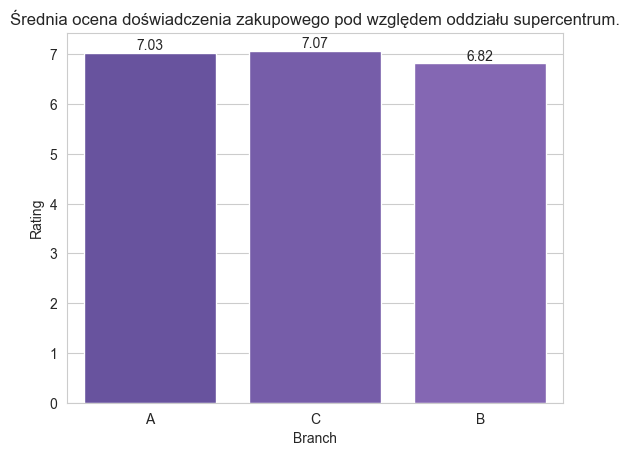

In [166]:
ax = sns.barplot(
    data=df,
    x="Branch",
    y="Rating",
    errorbar=None,
    estimator="mean",
    palette=custom_palette,
)

plt.title("Średnia ocena doświadczenia zakupowego pod względem oddziału supercentrum.")

for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )

plt.show()

Na wykresie również nie widać żadnych szczególnych różnic w średniej.

# Analiza dochodów brutto

W tej części raportu przyjrzymy się dochodom brutto i zbadamy zależności dochodów od cech identyfikujących transakcje.

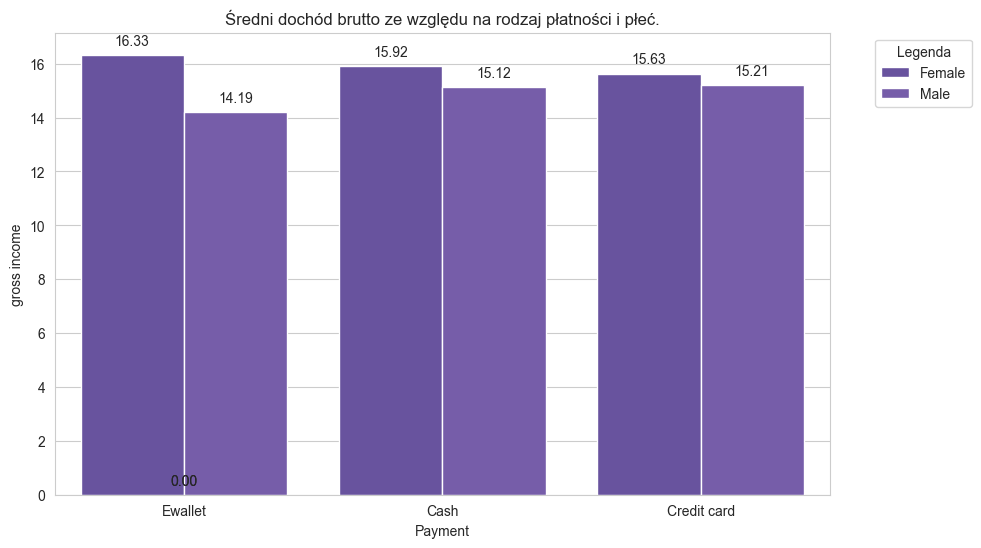

In [170]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x="Payment",
    y="gross income",
    hue="Gender",
    errorbar=None,
    estimator="mean",
    palette=custom_palette,
)
plt.title("Średni dochód brutto ze względu na rodzaj płatności i płeć.")
plt.legend(title="Legenda", bbox_to_anchor=(1.05, 1), loc="upper left")
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 10),
        textcoords="offset points",
    )

Podobnie jak w przypadku oceny doświadczenia zakupowego, dochody brutto nie wykazują żadnych szczególnych zależności od płci klienta oraz typu płatności.

Przyjrzyjmy się zależności dochodów brutto od rodzaju produktu.

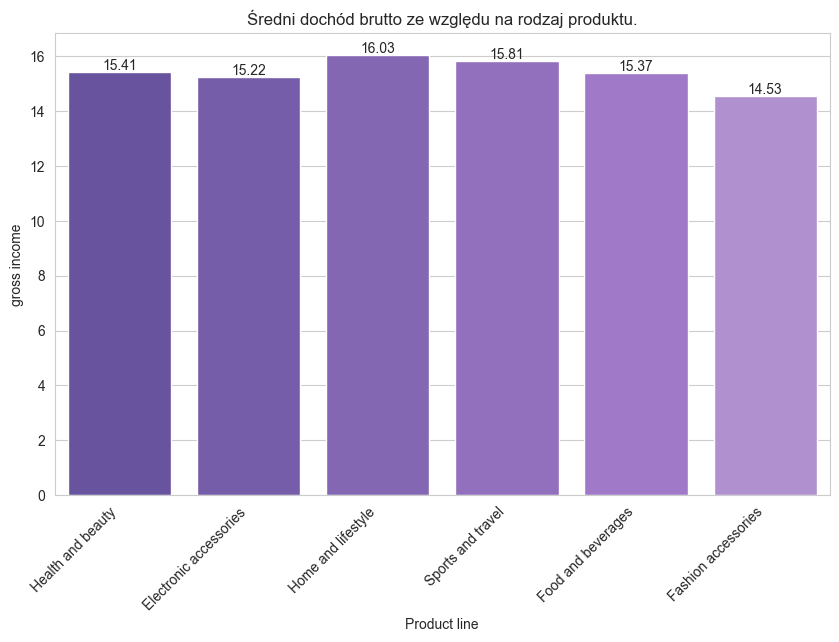

In [172]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x="Product line",
    y="gross income",
    errorbar=None,
    estimator="mean",
    palette=custom_palette,
)
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 5),
        textcoords="offset points",
    )
plt.title("Średni dochód brutto ze względu na rodzaj produktu.")
plt.xticks(rotation=90)
# Rotate x-labels to 45 degrees and set ha to right
for label in ax.get_xticklabels():
    label.set_rotation(45)
    label.set_ha("right")
plt.show()

Różnice pomiędzy średnim dochodem brutto ze względu a kategorią produktów są bardzo małe. Jest to sprzeczne z rzeczywistością ponieważ ceny produktów w tych kategoriach bardzo się różnią więc powinna istnieć zauważalna różnica.

Przyjrzymy się również potencjalnie ciekawej zależności dochodów brutto od oceny doświadczenia zakupowego.

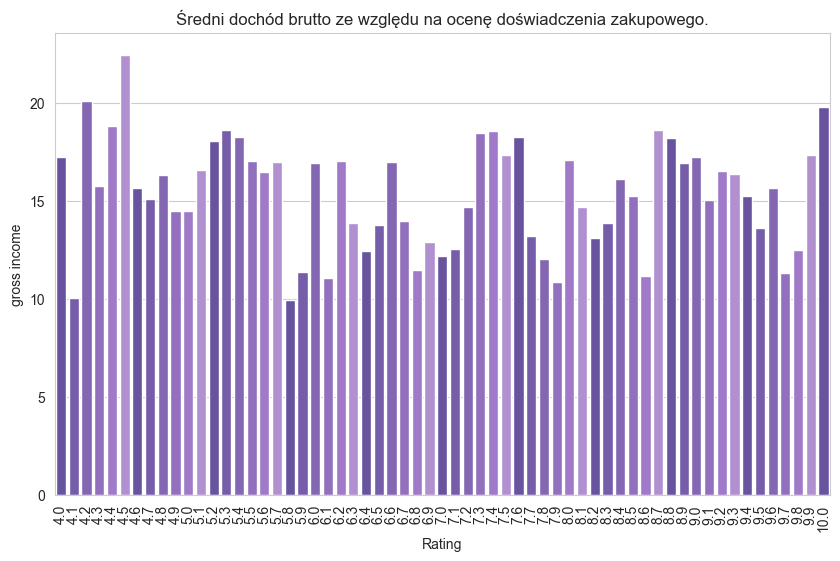

In [173]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x="Rating",
    y="gross income",
    errorbar=None,
    estimator="mean",
    palette=custom_palette,
)
plt.xticks(rotation=90)
plt.title("Średni dochód brutto ze względu na ocenę doświadczenia zakupowego.")
plt.show()

Z wykresu ciężko ocenić czy zadowolenie klienta ma jakiś realny wpływ na średni dochód brutto. W celu lepszej wizaulizacji podzieliliśmy ocenę na kategorie.

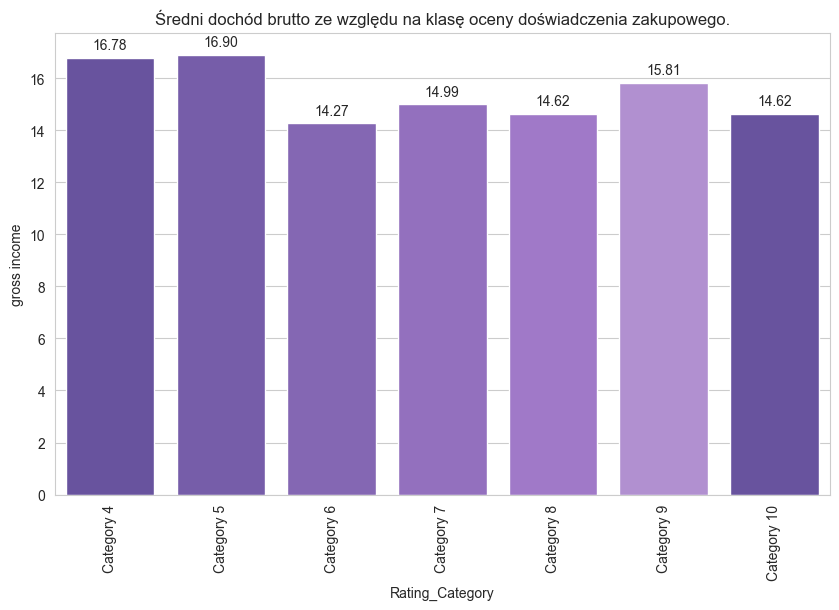

In [182]:
def map_rating_category2(rating):
    categories = [
        (4.0, "Category 4"),
        (4.6, "Category 5"),
        (5.6, "Category 6"),
        (6.6, "Category 7"),
        (7.6, "Category 8"),
        (8.6, "Category 9"),
        (9.6, "Category 10"),
    ]
    for lower_bound, category in categories:
        if lower_bound <= rating < lower_bound + 1:
            return category
    return "Other"


# Apply the mapper to the "Rating" column
df["Rating_Category"] = df["Rating"].apply(map_rating_category2)

order_list = [
    "Category 4",
    "Category 5",
    "Category 6",
    "Category 7",
    "Category 8",
    "Category 9",
    "Category 10",
]
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df,
    x="Rating_Category",
    y="gross income",
    errorbar=None,
    estimator="mean",
    palette=custom_palette,
    order=order_list,
)
plt.xticks(rotation=90)
plt.title("Średni dochód brutto ze względu na klasę oceny doświadczenia zakupowego.")
for p in ax.patches:
    ax.annotate(
        f"{p.get_height():.2f}",
        (p.get_x() + p.get_width() / 2.0, p.get_height()),
        ha="center",
        va="center",
        xytext=(0, 9),
        textcoords="offset points",
    )
plt.show()

Po podziale na kategorie wykres pokazuje że największy średni dochód brutto jest z klientów najmniej zadowolonych. Co jest sytuacją nie realistyczną.

## Sprawdzanie istotności

W tej części raportu przyjrzymy się dokładniej różnicom w dochodach brutto pomiędzy kategoriami oceny doświadczenia zakupowego.

Najpierw wykorzystamy wykres pudełkowy aby sprawdzić rozkład dochodów w kategoriach.

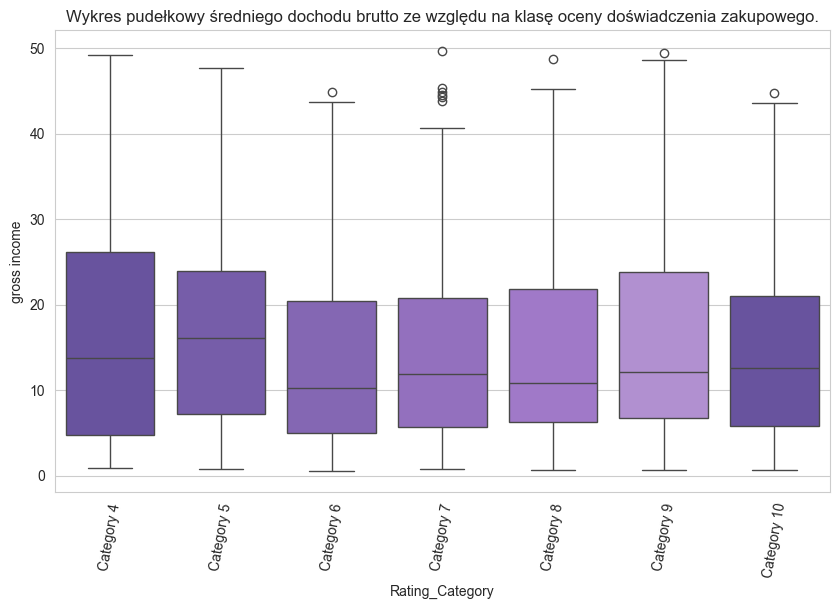

In [184]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x="Rating_Category",
    y="gross income",
    order=order_list,
    palette=custom_palette,
)
plt.title(
    "Wykres pudełkowy średniego dochodu brutto ze względu na klasę oceny doświadczenia zakupowego."
)
plt.xticks(rotation=80)
plt.show()

Wykres pudełkowe pokazują że występują małe różnice pomiędzy kategoriami oceny doświadczenia zakupowego. W dalszej częśi sprawdzimy czy te różnice są istotnie statystycznie.

## Test ANOVA

W projekcie zastosowaliśmy test ANOVA, aby ocenić, czy istnieją istotne statystycznie różnice między średnimi wartościami dochodu brutto w różnych grupach. Wyniki tego testu pomagają zrozumieć, czy dochody brutto są równomiernie rozłożone we wszystkich analizowanych grupach oceny doświadczenia zakupowego.

Hipoteza zerowa $H_0$: Średnie gross income są równe we wszystkich kategoriach.

Hipoteza alternatywna $H_1$: Istnieją różnice w średnich gross income między co najmniej dwiema kategoriami.

In [185]:
from scipy.stats import f_oneway

# Załóżmy, że masz DataFrame 'data' z kolumnami 'category' i 'gross_income'
result = f_oneway(
    *[
        df["gross income"][df["Rating_Category"] == category]
        for category in df["Rating_Category"].unique()
    ]
)

print("Statystyka testowa F:", result.statistic)
print("P-wartość:", result.pvalue)

Statystyka testowa F: 1.1454466226443982
P-wartość: 0.33372368680860054


Wartość P wynosi 0.33, jest większa przyjętego poziomu istotności wynoszącego 0.05. Zatem, nie ma podstaw do odrzucenia hipotezy zerowej. Możemy stwierdzić, że średnie dochody brutto są równe we wszystkich kategoriach.

# T-test

Wykorzystamy również test t-studenta, aby ocenić, czy średnie wartości gross income są równe dla obu płci. Test ten umożliwia statystyczne porównanie różnic między dwiema grupami, w tym przypadku grupą mężczyzn i grupą kobiet. Wyniki t-testu pozwolą zidentyfikować ewentualne istotne różnice w średnich dochodach brutto między płciami.

Hipoteza zerowa $H_0$: Średnie gross income dla obu płci są równe.

Hipoteza alternatywna $H_1$: Średnie gross income dla obu płci nie są równe.

In [186]:
from scipy.stats import ttest_ind

# Załóżmy, że masz DataFrame 'data' z kolumnami 'gender' (mężczyzna/kobieta) i 'gross_income'
gross_income_male = df[df["Gender"] == "Male"]["gross income"]
gross_income_female = df[df["Gender"] == "Female"]["gross income"]

# Przeprowadź test t-Studenta
result = ttest_ind(gross_income_male, gross_income_female)

print("Statystyka testowa t:", result.statistic)
print("P-wartość:", result.pvalue)

Statystyka testowa t: -1.5641266415240969
P-wartość: 0.11810484577135819


Wartość P wynosi 0.11 i jest większa od przyjętego poziomu istoności wynoszącego 0.05. W związku z tym, nie ma podstaw do odrzucenia hipotezy zerowej. Przyjmujemy hipotezę zerową, że średnie dochody brutto są równe dla obu płci.

# Analiza liczby odwiedzin w zależności od godziny

Jeżeli przyjrzymy się danym udostępnianym przez Google dotyczącym ruchu w sklepach, to możemy zauważyć, że największy ruch w sklepach jest w godzinach popołudniowych, a najmniejszy w godzinach nocnych oraz porannych. Choć godzina jest wartością dyskretną, to oczekujemy, że rozkład liczby odwiedzin będzie przypominał rozkład normalny. W przeciwnym wypadku możemy podejrzewać, że dane zostały wygenerowane sztucznie.

W tej części raportu przyjrzymy się rozkładowi liczby odwiedzin w zależności od godziny.

Text(0.5, 1.0, 'Liczba odwiedzin w danej godzinie')

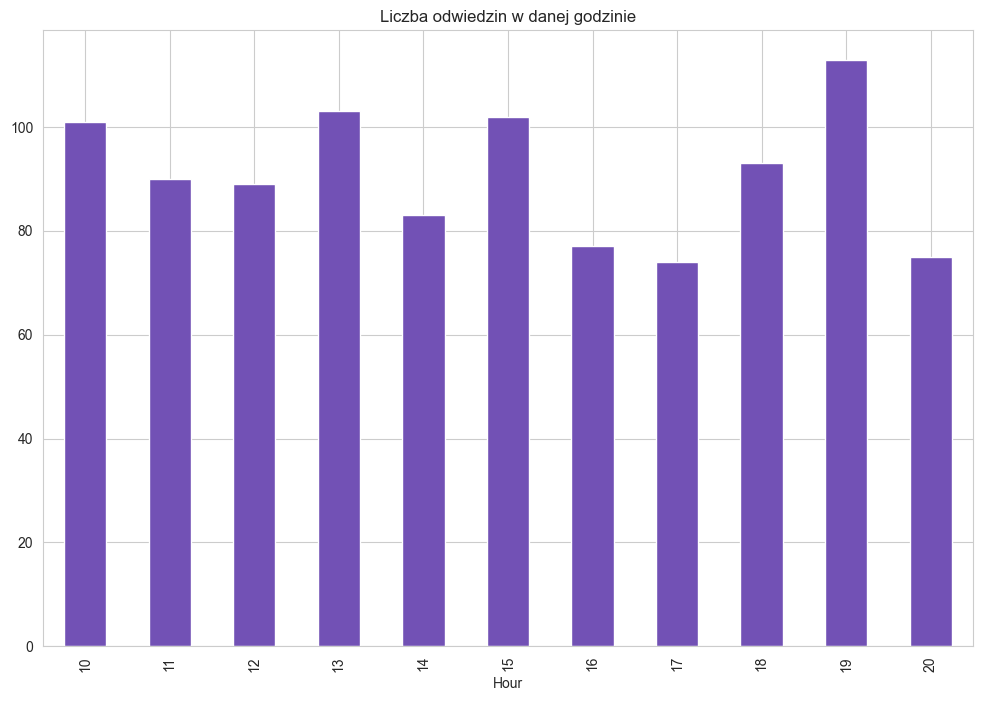

In [187]:
# Liczba odwiedzin w danej godzinie - wykres
df["Hour"] = df["Datetime"].dt.hour

df.groupby("Hour")["Invoice ID"].count().plot(
    kind="bar", figsize=(12, 8), color=get_color(1)
).set_title("Liczba odwiedzin w danej godzinie")

Na pierwszy rzut oka rozkład nie przypomina rozkładu normalnego. Można pokusić się o stwierdzenie, że rozkład jest próbą rozkladu równomiernego.

Ponieważ zmienna jest dyskretna, do tego o ścisłej, niewielkiej ilości kategorii, uznanie jej za "semi-continuous" nie ma sensu. Eliminuje to możliwość wykorzystania testu Shapiro-Wilka do sprawdzenia normalności rozkładu, jako iż założenie o ciągłości zmiennej jest fundalmentalnym założeniem tego testu. Podobnie nie możemy wykorzystać testu Kolmogorova-Smirnova, ponieważ test ten jest również przeznaczony dla zmiennych ciągłych.

Odpowiedni natomiast zdaje się być test chi-kwadrat, który pozwala na wykorzystanie zmiennych dyskretnych. Test chi-kwadrat pozwala na sprawdzenie, czy rozkład zmiennej jest zgodny z rozkładem teoretycznym.

Zaczniemy wobec tego od zamodelowania hipotetycznego rozkładu teoretycznego w oparciu o wiedzę domenową, próbkując rozkład normalny.

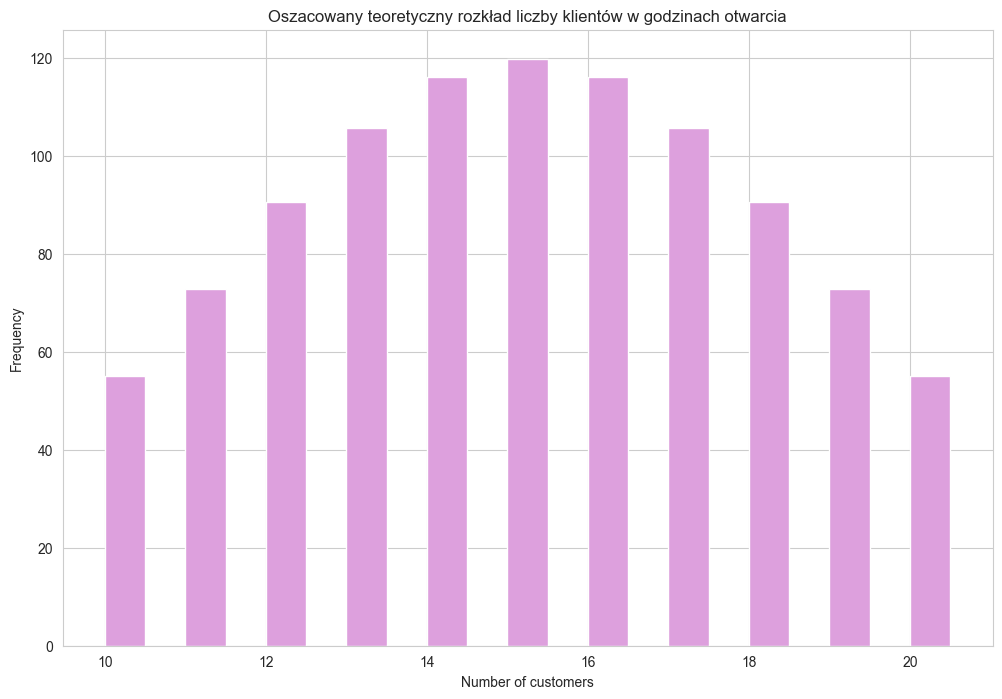

In [200]:
# Sample size
n_samples = 1000

# Assuming the mean and standard deviation
mean = 15.5
std_dev = 4

# Create bins for the histogram, assuming integer values
bins = np.arange(12) + 10  # to center bins around integers

# Calculate the probabilities for each bin using the CDF
bin_probs = stats.norm.cdf(bins[1:], loc=mean, scale=std_dev) - stats.norm.cdf(
    bins[:-1], loc=mean, scale=std_dev
)

# Convert probabilities to expected frequencies
expected_frequencies = bin_probs * n_samples

expected_frequencies_normalized = (
    expected_frequencies / expected_frequencies.sum() * n_samples
)

expected_frequencies_normalized, expected_frequencies_normalized.sum()

# Plot expected frequencies vs observed frequencies
plt.figure(figsize=(12, 8))
plt.bar(
    bins[:-1], expected_frequencies_normalized, width=0.5, align="edge", color="plum"
)
plt.xlabel("Number of customers")
plt.ylabel("Frequency")
plt.title("Oszacowany teoretyczny rozkład liczby klientów w godzinach otwarcia")

# Color purple
plt.show()

# Test chi-kwadrat

Wykorzystamy wspomniany wyżej test chi-kwadrat do sprawdzenia, czy rozkład liczby odwiedzin jest zgodny z rozkładem normalnym.

Hipoteza zerowa $H_0$: Rozkład liczby odwiedzin jest zgodny z oczekiwanym rozkładem.

Hipoteza alternatywna $H_1$: Rozkład liczby odwiedzin nie jest zgodny z oczekiwanym rozkładem.

In [203]:
# Compute chi-square test statistic
result = stats.chisquare(
    list(df.groupby("Hour")["Invoice ID"].count()),
    expected_frequencies_normalized,
    axis=None,
)

print("Statystyka testowa chi-square:", result.statistic)
print("P-value:", result.pvalue)

Statystyka testowa chi-square: 106.74783446242944
P-value: 2.4113263806526283e-18


Wartość P jest bliska zeru i jest mniejsza od przyjętego poziomu istoności wynoszącego 0.05. W związku z tym, odrzucamy hipotezę zerową. Przyjmujemy hipotezę alternatywną, że rozkład liczby odwiedzin nie jest zgodny z oczekiwanym rozkładem.

# Podsumowanie

Tu napisać wnioski